In [20]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cleaned_combined_data.csv')
data = data.dropna()
data.head()

,Unnamed: 0,accelerometer_right_foot_x,accelerometer_right_foot_y,accelerometer_right_foot_z,gyroscope_right_foot_x,gyroscope_right_foot_y,gyroscope_right_foot_z,accelerometer_right_shin_x,accelerometer_right_shin_y,accelerometer_right_shin_z,...,accelerometer_left_thigh_x,accelerometer_left_thigh_y,accelerometer_left_thigh_z,gyroscope_left_thigh_x,gyroscope_left_thigh_y,gyroscope_left_thigh_z,EMG_right,EMG_left,activity,source_file
0,0,-9984,-7184,10216,-32,151,-111,-16588,1140,-2432,...,-16160,1716,-1504,533,407,98,125,115,standing,HuGaDB_v2_various_16_09.csv
1,1,-9972,-7292,10224,-22,158,-145,-16484,1116,-2520,...,-16200,1808,-1292,374,323,139,125,115,standing,HuGaDB_v2_various_16_09.csv
2,2,-9952,-7252,10232,-52,152,-95,-16472,1216,-2444,...,-16256,1804,-1048,420,324,212,125,115,standing,HuGaDB_v2_various_16_09.csv
3,3,-9980,-7236,10156,-100,199,-156,-16432,1224,-2376,...,-16296,1736,-896,641,126,146,125,115,standing,HuGaDB_v2_various_16_09.csv
4,4,-10012,-7164,10212,-76,196,-139,-16532,1076,-2508,...,-16332,1928,-980,785,-59,145,125,115,standing,HuGaDB_v2_various_16_09.csv


In [3]:
activities = data['activity'].unique()
print(activities)

['standing' 'going_down' 'walking' 'up_by_elevator' 'down_by_elevator'
 'going_up' 'running' 'sitting_down' 'sitting' 'standing_up']


In [4]:
data['activity'] = data['activity'].map({'standing': 0, 'going_down': 1, 'walking': 2, 'up_by_elevator': 3, 'down_by_elevator': 4, 'going_up': 5, 'running': 6, 'sitting_down': 7, 'sitting': 8, 'standing_up': 9 })

In [5]:
X = data[['accelerometer_right_foot_y', 'accelerometer_right_foot_z',
       'gyroscope_right_foot_x', 'gyroscope_right_foot_y',
       'gyroscope_right_foot_z', 'accelerometer_right_shin_x',
       'accelerometer_right_shin_y', 'accelerometer_right_shin_z',
       'gyroscope_right_shin_x', 'gyroscope_right_shin_y',
       'gyroscope_right_shin_z', 'accelerometer_right_thigh_x',
       'accelerometer_right_thigh_y', 'accelerometer_right_thigh_z',
       'gyroscope_right_thigh_x', 'gyroscope_right_thigh_y',
       'gyroscope_right_thigh_z', 'accelerometer_left_foot_x',
       'accelerometer_left_foot_y', 'accelerometer_left_foot_z',
       'gyroscope_left_foot_x', 'gyroscope_left_foot_y',
       'gyroscope_left_foot_z', 'accelerometer_left_shin_x',
       'accelerometer_left_shin_y', 'accelerometer_left_shin_z',
       'gyroscope_left_shin_x', 'gyroscope_left_shin_y',
       'gyroscope_left_shin_z', 'accelerometer_left_thigh_x',
       'accelerometer_left_thigh_y', 'accelerometer_left_thigh_z',
       'gyroscope_left_thigh_x', 'gyroscope_left_thigh_y',
       'gyroscope_left_thigh_z', 'EMG_right', 'EMG_left']]
y = data['activity']

In [6]:
X

,accelerometer_right_foot_y,accelerometer_right_foot_z,gyroscope_right_foot_x,gyroscope_right_foot_y,gyroscope_right_foot_z,accelerometer_right_shin_x,accelerometer_right_shin_y,accelerometer_right_shin_z,gyroscope_right_shin_x,gyroscope_right_shin_y,...,gyroscope_left_shin_y,gyroscope_left_shin_z,accelerometer_left_thigh_x,accelerometer_left_thigh_y,accelerometer_left_thigh_z,gyroscope_left_thigh_x,gyroscope_left_thigh_y,gyroscope_left_thigh_z,EMG_right,EMG_left
0,-7184,10216,-32,151,-111,-16588,1140,-2432,789,418,...,26,-59,-16160,1716,-1504,533,407,98,125,115
1,-7292,10224,-22,158,-145,-16484,1116,-2520,647,343,...,-11,-132,-16200,1808,-1292,374,323,139,125,115
2,-7252,10232,-52,152,-95,-16472,1216,-2444,650,350,...,-10,-97,-16256,1804,-1048,420,324,212,125,115
3,-7236,10156,-100,199,-156,-16432,1224,-2376,557,346,...,66,-94,-16296,1736,-896,641,126,146,125,115
4,-7164,10212,-76,196,-139,-16532,1076,-2508,419,293,...,97,-58,-16332,1928,-980,785,-59,145,125,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137274,-6796,10372,-231,201,-377,-16536,928,-2808,-105,-36,...,34,-177,-16044,2696,-2328,303,-237,-37,122,113
1137275,-6772,10352,-231,153,-302,-16492,1076,-2876,4,-56,...,30,-153,-15972,2676,-2344,329,-232,-64,122,113
1137276,-6728,10352,-191,145,-362,-16400,1020,-2820,-61,-41,...,22,-158,-15980,2756,-2068,242,-296,-31,122,113
1137277,-6804,10352,-186,153,-398,-16400,868,-2644,26,-26,...,17,-140,-15968,2720,-2016,231,-307,-14,122,114


In [7]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1137274    0
1137275    0
1137276    0
1137277    0
1137278    0
Name: activity, Length: 1137279, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((909823, 37), (227456, 37), (909823,), (227456,))

In [35]:
rf = RandomForestClassifier(n_estimators=16, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=16, n_jobs=-1)

In [36]:
y_pred = rf.predict(X_test)

In [37]:
y_pred

array([2, 3, 5, ..., 0, 0, 5], dtype=int64)

In [38]:
pred_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred})
pred_df

,Actual Value,Predicted Value
843894,2,2
159874,3,3
9193,5,5
1060177,1,1
334458,5,5
...,...,...
938174,2,2
93723,1,1
362774,0,0
962194,0,0


In [39]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9100177616769837


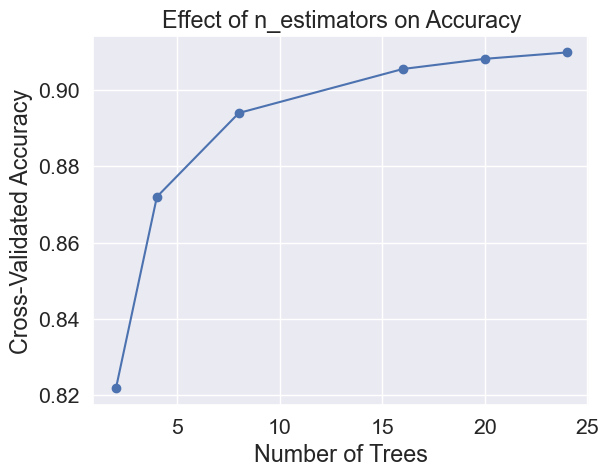

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

estimators = [2, 4, 8, 16, 20, 24]
scores = []

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, n_jobs=-1)
    score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    scores.append(score)

plt.plot(estimators, scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Effect of n_estimators on Accuracy')
plt.show()


In [17]:
confusion_matrix(y_test, y_pred)


array([[40186,    51,   123,  2578,  1594,    37,     0,    58,     0,
           57],
       [  214, 21965,  1204,     4,     4,   316,    51,     2,     0,
            3],
       [  197,  2404, 59307,     3,     3,  1256,   138,     1,     0,
            0],
       [ 5437,     6,     7, 10893,  1223,     1,     0,     0,     0,
            1],
       [ 4085,    11,    14,  2569,  7112,     3,     0,     0,     0,
            2],
       [  228,   532,  2187,     3,     0, 23996,    22,     6,     0,
           10],
       [   12,   143,   454,     0,     2,    38, 12425,     0,     0,
            0],
       [  174,    12,     9,     5,     2,     8,     1,  3353,    55,
            0],
       [    4,     7,     0,     0,     0,     1,     3,    98, 16506,
           29],
       [  255,     6,    10,     0,     1,    16,     0,     1,   152,
         3570]], dtype=int64)

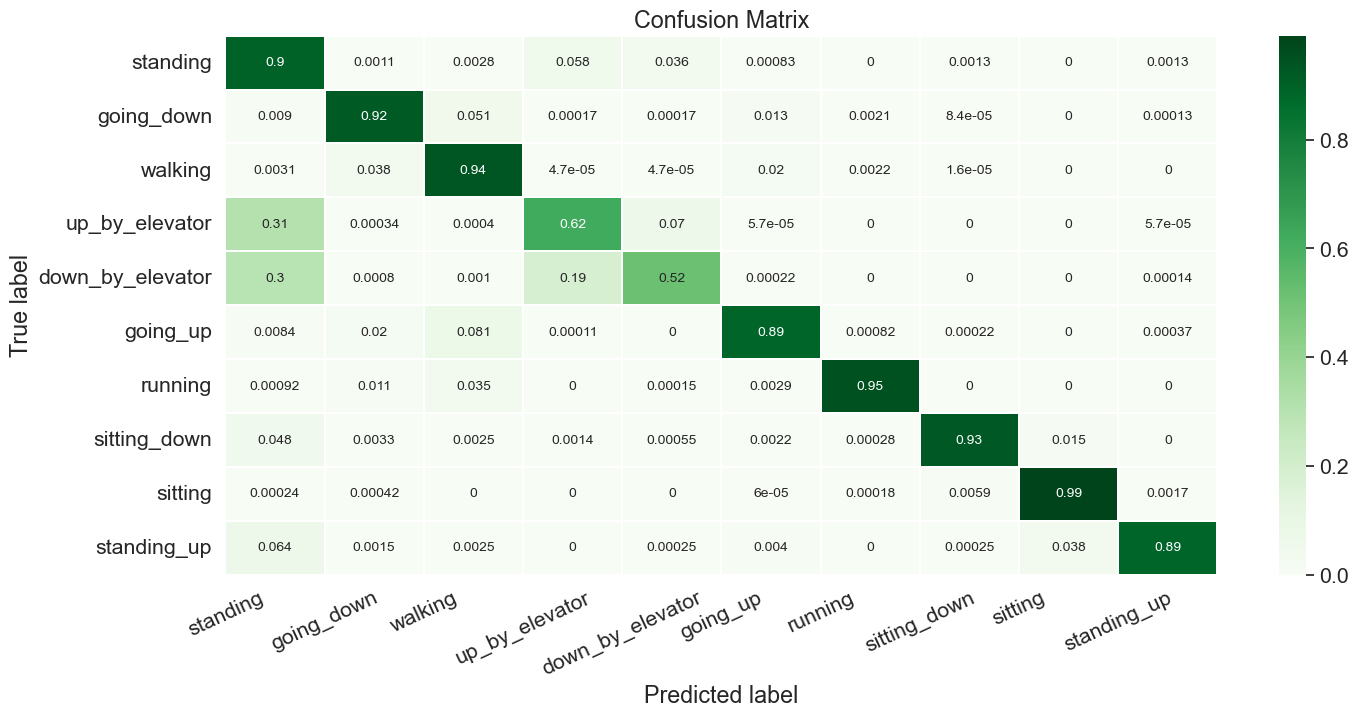

In [33]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['standing', 'going_down', 'walking', 'up_by_elevator', 'down_by_elevator', 'going_up', 'running', 'sitting_down', 'sitting', 'standing_up']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [30]:
y_test

843894     2
159874     3
9193       5
1060177    1
334458     5
          ..
938174     2
93723      1
362774     0
962194     0
97339      5
Name: activity, Length: 227456, dtype: int64